# Final Project 

# ISM 6136 - DataMining 

### Group Members

Alka Santosh Naik

Krishna Sumanth Pulikonda

Sai Naveen Sangaraju

Sathvika Meka

#### Importing necessary libraries

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Data visuals libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# To split dataset in to train and test
from sklearn.model_selection import train_test_split

# Encoder for categorical variable
from sklearn.preprocessing import LabelEncoder

# Importing necessary regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Tune the model parameters
from sklearn.model_selection import GridSearchCV

#### Reading flipkart mobile data 

In [2]:
flipkart = pd.read_csv("C:\\Users\\alkas\\Desktop\\Data Mining\\Assignment\\Flipkart Mobile - 2.csv")

#### Creating a copy of the data set before the transformation.

In [3]:
graphs=flipkart.copy()

#### Dimensions of the dataset

In [4]:
flipkart.shape

(430, 16)

#### Displaying the first 5 rows of the dataset

In [5]:
flipkart.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


#### Data type of columns before the tranformation.

In [6]:
print(flipkart.dtypes)

brand                object
model                object
base_color           object
processor            object
screen_size          object
ROM                   int64
RAM                   int64
display_size        float64
num_rear_camera       int64
num_front_camera      int64
battery_capacity      int64
ratings             float64
num_of_ratings        int64
sales_price           int64
discount_percent    float64
sales               float64
dtype: object


Identifying the categorical data to transform them into numerical data

#### Identifying the missing numbers/ values

In [7]:
flipkart.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

As the sum of all the columns is 0 we can say there is no missing numbers or values.

#### Checking for duplicate in the dataset

In [8]:
flipkart[flipkart.duplicated()]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales


No duplicates

#### Statistical describing for the numerical columns in dataset.

In [9]:
print(flipkart.describe())

              ROM         RAM  display_size  num_rear_camera  \
count  430.000000  430.000000    430.000000       430.000000   
mean   105.748837    5.320930      6.369767         2.904651   
std     63.164064    2.182635      0.369549         0.952350   
min      8.000000    1.000000      4.700000         1.000000   
25%     64.000000    4.000000      6.300000         2.000000   
50%    128.000000    4.000000      6.500000         3.000000   
75%    128.000000    6.000000      6.500000         4.000000   
max    512.000000   12.000000      7.600000         4.000000   

       num_front_camera  battery_capacity     ratings  num_of_ratings  \
count        430.000000        430.000000  430.000000      430.000000   
mean           1.044186       4529.397674    4.339302    23567.944186   
std            0.227280        986.907252    0.151494    56096.277784   
min            1.000000       1800.000000    3.000000        4.000000   
25%            1.000000       4000.000000    4.300000     

Analysis:

Display Size:
The display size ranges from 4.7 to 7.6 inches.
On average, the display size preferred by the consumers is around 6.37 inches.

Ratings:
The ratings range from 3.0(least liked) to 4.6(most liked).
The average rating given to a mobile phone model is approximately 4.34.

Number of Ratings:
The number of model sold varies widely, ranging from 4 to 642,373, telling some mobile model were sold in high numbers and some sold is very less numbers.
On average, devices sold was about 23,567, with a large standard deviation of 56,096.28.

Sales Price:
Sales prices range from 5742 to 157,999.
The mean sales price of a mobile phone is around 25,433.

Discount Percent:
Discount percentages vary from 1% to 44%.
On average, devices have a discount of approximately 10.8%.

Sales:
The sales figures range from 0 to 550.19.
The average sales figure is approximately 29.75.

#### Statistical describing for the Categorical columns in dataset.

In [10]:
print(graphs.describe(exclude = ['float', 'int64']))

         brand      model base_color processor screen_size
count      430        430        430       430         430
unique       5        119         12         7           5
top     Realme  iPhone XR       Blue  Qualcomm       Large
freq       138         18        117       168         242


These insights provide an understanding of the categorical variables and their respective frequencies within the dataset. Such information can be useful for understanding popular or common attributes within the mobile devices, which could further assist in marketing strategies, product positioning, or understanding consumer preferences for specific features or brands.

Here we see Brand Realme, model iPhone XR, base_color Blue, processor Qualcomm, screen_size Large is more consumed by the comsumers.

#### Transforming the identified categorical data into numerical data for better analysis

In [11]:
# Creating a instance of label Encoder.
le = LabelEncoder()

#transforming the categorical columns
label = le.fit_transform(flipkart['screen_size'])
# Display the original class labels and their corresponding encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Original labels screen_size:", le.classes_)
print("Encoded values screen_size:", [label_mapping[label] for label in le.classes_])

label1 = le.fit_transform(flipkart['processor'])
# Display the original class labels and their corresponding encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Original labels processor:", le.classes_)
print("Encoded values processor:", [label_mapping[label] for label in le.classes_])

label2 = le.fit_transform(flipkart['brand'])
# Display the original class labels and their corresponding encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Original labels brand:", le.classes_)
print("Encoded values brand:", [label_mapping[label] for label in le.classes_])

label3 = le.fit_transform(flipkart['base_color'])
# Display the original class labels and their corresponding encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Original labels base_color:", le.classes_)
print("Encoded values base_color:", [label_mapping[label] for label in le.classes_])

label4 = le.fit_transform(flipkart['model'])
# Display the original class labels and their corresponding encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Original labels model:", le.classes_)
print("Encoded values model:", [label_mapping[label] for label in le.classes_])

Original labels screen_size: ['Large' 'Medium' 'Small' 'Very Large' 'Very Small']
Encoded values screen_size: [0, 1, 2, 3, 4]
Original labels processor: ['Ceramic' 'Exynos' 'MediaTek' 'Others' 'Qualcomm' 'Water' 'iOS']
Encoded values processor: [0, 1, 2, 3, 4, 5, 6]
Original labels brand: ['Apple' 'Poco' 'Realme' 'Samsung' 'Xiaomi']
Encoded values brand: [0, 1, 2, 3, 4]
Original labels base_color: ['Black' 'Blue' 'Bronze' 'Gold' 'Gray' 'Green' 'Others' 'Purple' 'Red'
 'Silver' 'White' 'Yellow']
Encoded values base_color: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Original labels model: ['3i' '5 Pro' '6' '6i' '7' '7 Pro' '8' '8 5G' '8 Pro' '8s 5G' 'C11'
 'C11 2021' 'C12' 'C15' 'C2' 'C20' 'C21' 'C21Y' 'C25' 'C3' 'F1' 'F3 GT'
 'GT 5G' 'GT Master Edition' 'Galaxy A03s' 'Galaxy A10' 'Galaxy A12'
 'Galaxy A20' 'Galaxy A20s' 'Galaxy A21s' 'Galaxy A22' 'Galaxy A22 5G'
 'Galaxy A31' 'Galaxy A50s' 'Galaxy A51' 'Galaxy A52' 'Galaxy A52s 5G'
 'Galaxy A7' 'Galaxy A71' 'Galaxy A72' 'Galaxy A80' 'Galaxy 

In [12]:
#dropping the existing untransformed categorical column
flipkart.drop("screen_size", axis=1, inplace=True)
flipkart.drop("processor", axis=1, inplace=True)
flipkart.drop("brand", axis=1, inplace=True)
flipkart.drop("base_color", axis=1, inplace=True)
flipkart.drop("model", axis=1, inplace=True)

# Appending the array to the flipkart dataFrame 
flipkart["screen_size"] = label
flipkart["processor"] = label1
flipkart["brand"] = label2
flipkart["base_color"] = label3
flipkart["model"] = label4

# printing Dataframe post transformation
flipkart

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,screen_size,processor,brand,base_color,model
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,4,5,0,0,117
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,2,0,0,8,114
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,4,5,0,8,117
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,1,6,0,6,118
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,1,0,0,8,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50,2,4,4,0,91
426,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73,2,4,4,8,91
427,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42,0,4,4,6,76
428,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77,1,4,4,1,93


#### Data type of columns after the tranformation.

In [13]:
print(flipkart.dtypes)

ROM                   int64
RAM                   int64
display_size        float64
num_rear_camera       int64
num_front_camera      int64
battery_capacity      int64
ratings             float64
num_of_ratings        int64
sales_price           int64
discount_percent    float64
sales               float64
screen_size           int32
processor             int32
brand                 int32
base_color            int32
model                 int32
dtype: object


#### Graphical representations of datasets

###### Boxplot for analizing relation between sales price and brand

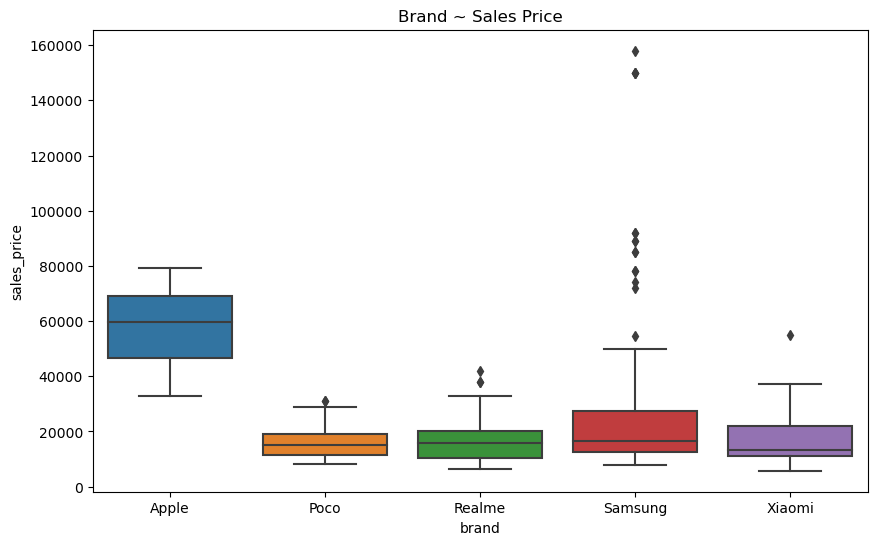

In [14]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'brand',y = 'sales_price', data = graphs)
plt.title("Brand ~ Sales Price")
plt.show()

Brand and sales price gives us insight on sales price distribution of each brand. Here we can see that Apple prices its mobile phones at higher prices, where Poco, Xiaomi and Realme having sales price distribution on a lower end with 1 or 2 outliers. Samsung has majority of the of the mobile phones prices at lower end but has some mobile which are prices extremely high and are considered as outliers.

##### Barplot for analyzing brand wise color performance

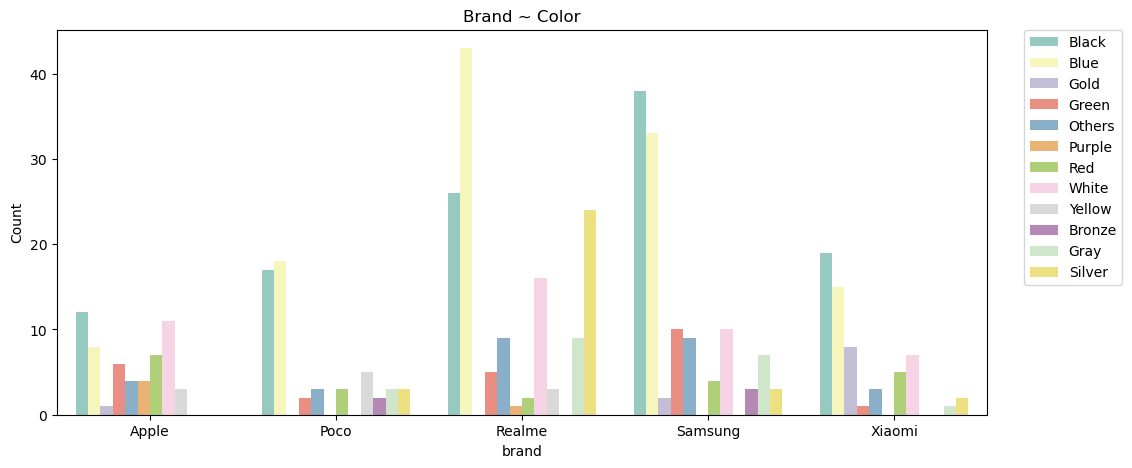

In [15]:
brand_color = graphs.groupby(['brand', 'base_color']).size().reset_index(name = 'Count')
plt.figure(figsize = (12,5))
sns.barplot(x = 'brand', y = 'Count', hue = 'base_color', data = brand_color, palette = 'Set3')
plt.title("Brand ~ Color")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

Brand and color graph gives us insight on the color that is popular among the customers and most likely to be sold. According to the graph we can say Black and Blue are the 2 base color that are high in demand and these color mobiles must be ordered or stocked in large quantity to meet the sales expectation. 

#### Pie chart displaying Processor distribution by sales

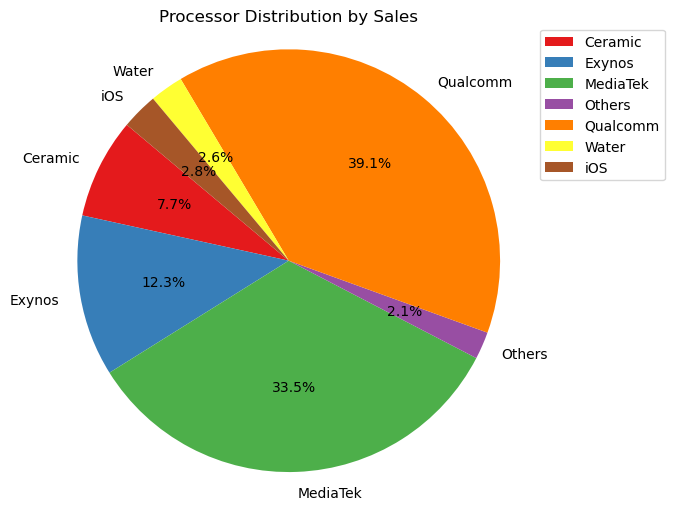

In [16]:
processor = graphs.groupby(['processor', 'sales']).size().reset_index(name='Count')

# Creating a pie chart
plt.figure(figsize=(6, 6))
sales_count = processor.groupby('processor')['Count'].sum()
plt.pie(sales_count, labels=sales_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.axis('equal') 
plt.title("Processor Distribution by Sales")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

On analyzing the processor distribution we notice Qualcomm and MediaTek are heights in sales

#### Visualize brand distribution

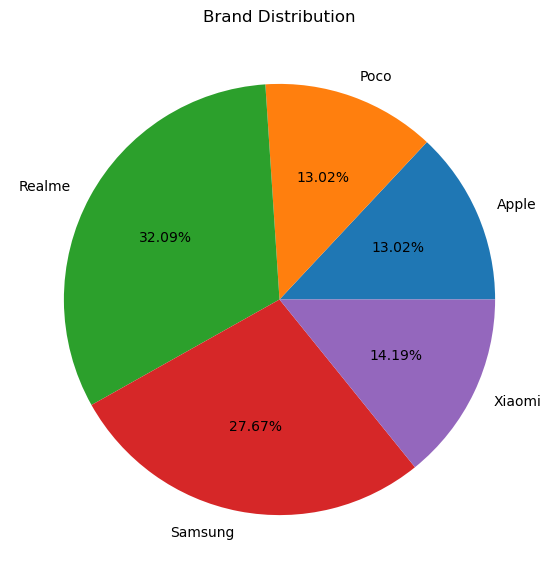

In [17]:
brand = graphs.groupby(['brand']).size().reset_index(name = 'Count')
plt.figure(figsize=(7, 7))
plt.pie(brand['Count'], labels=brand['brand'], autopct='%1.2f%%')
plt.title('Brand Distribution')
plt.show()

Here we see majority of the mobiles are sold by the Realme and Samsumg brand.

#### Visualize screen size

<Axes: xlabel='screen_size', ylabel='Count'>

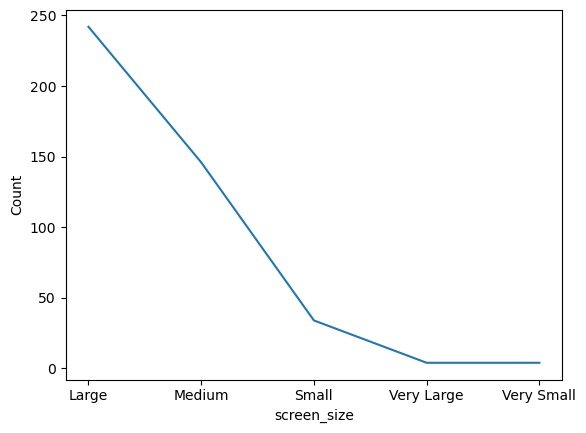

In [18]:
size = graphs.groupby(['screen_size']).size().reset_index(name = 'Count')
sns.lineplot(data=size,x="screen_size",y="Count")

As we see screen size with Large and medium is more desired by the consumers and are more likely to be sold which increases the sales.

#### Battery capacity density plot

<Axes: xlabel='battery_capacity', ylabel='Density'>

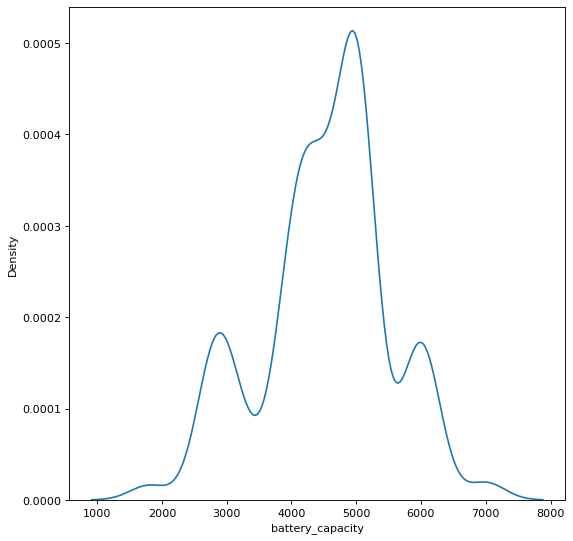

In [19]:
figure(figsize=(8, 8), dpi=80)
sns.kdeplot(graphs['battery_capacity'])

The density plot indicates multimodality as it has multiple peaks, we see higher peaks at battery capacity 4000 and 5000 which tells us that most mobile phones are produced between the 4000-5000 range.

#### Pearson Correlation 

C:\Users\alkas\AppData\Local\Temp\ipykernel_28640\3280583705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(graphs.corr(), annot=True)


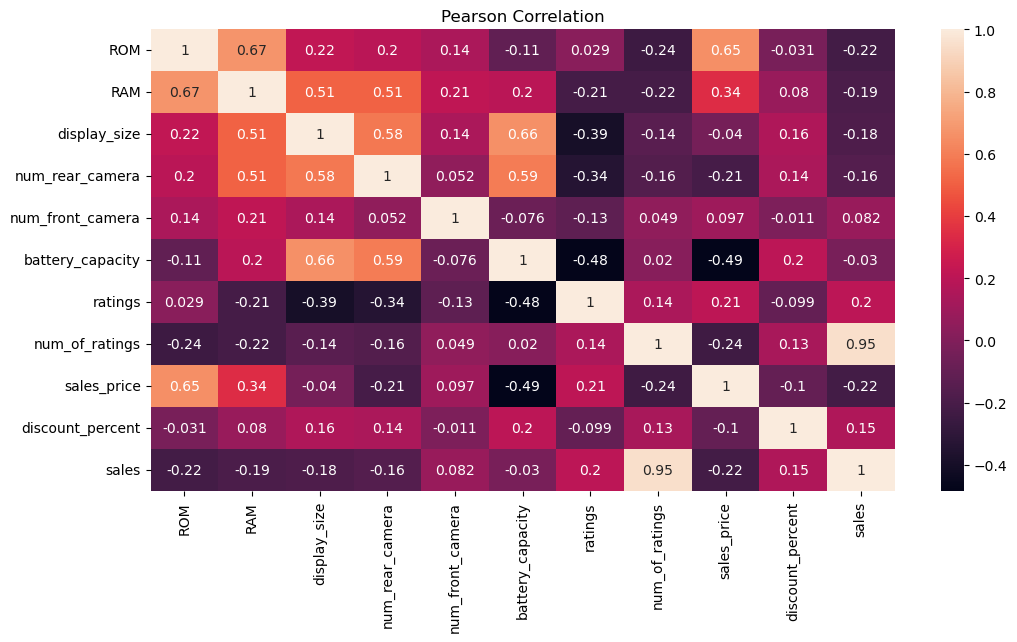

In [20]:
plt.figure(figsize = (12,6))
sns.heatmap(graphs.corr(), annot=True)
plt.title("Pearson Correlation")
plt.show()

Here we use Pearson Correlation to check the strength and direction of the linear relationship between two continuous variables

#### Initializing target and features

In [21]:
target=flipkart["sales"]

In [22]:
# Columns to drop
columns_to_drop = ['sales', 'ROM','RAM','num_rear_camera','battery_capacity','num_of_ratings','sales_price']

# Drop columns from the DataFrame
features = flipkart.drop(columns=columns_to_drop)

features

,display_size,num_front_camera,ratings,discount_percent,screen_size,processor,brand,base_color,model
0,4.7,1,4.5,0.17,4,5,0,0,117
1,5.4,1,4.5,0.04,2,0,0,8,114
2,4.7,1,4.5,0.17,4,5,0,8,117
3,6.1,1,4.6,0.10,1,6,0,6,118
4,6.1,1,4.6,0.02,1,0,0,8,113
...,...,...,...,...,...,...,...,...,...
425,5.8,1,4.3,0.30,2,4,4,0,91
426,5.8,1,4.3,0.28,2,4,4,8,91
427,6.5,1,4.2,0.12,0,4,4,6,76
428,6.2,1,4.2,0.07,1,4,4,1,93


We exclude sales, num_of_ratings and sales_price as sales=num_of_ratings*sales_price, this prevents data leakage
Data Leakage: If we include the exact number of sales as a feature for prediction, the model might essentially cheat by learning directly from the target variable. This could lead to inflated performance metrics during training but could perform poorly when used in real time.

We exclude ROM, RAM, num_rear_camera, battery_capacity as they are corelated to sales_price, increase in any of the mentioned feature increases the sales_price, including these feature may create issue of Multicollinearity which can negatively impact the model's performance. Highly correlated features might affect the interpretability of the model and not add additional information, leading to increased complexity without significantly improving the model's performance.

#### Split data into train/test sets

In [23]:
x_train, x_test,y_train,y_test = train_test_split(features,target,test_size =0.2,random_state = 42)

Here we are splitting data in 20% (testing) and 80% (training).

#### Linear regression

In [24]:
# fit Linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

#fit Linear regression 
prediction=lr.predict(x_test)
lr.score(x_test,y_test)

0.23694430888594653

#### Lasso regression

In [25]:
#fit Lasso regression 
lasso=linear_model.Lasso()
lasso.fit(x_train,y_train)

#predicting target
prediction_lasso=lasso.predict(x_test)
lasso.score(x_test,y_test)

0.11736242582854439

#### Redge regression

In [26]:
#fit redge regression
redge=linear_model.Ridge()
redge.fit(x_train,y_train)

#predicting target
prediction_redge=redge.predict(x_test)
redge.score(x_test,y_test)

0.22141757654599503

#### Decision Tree

In [27]:
#fit the decision tree dt
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

#predicting the score
dt.score(x_test,y_test)

0.8826214876807253

#### Feature importance of sales using decision tress

            Feature  Importance
0      display_size    0.259836
8             model    0.174110
6             brand    0.170710
3  discount_percent    0.156897
1  num_front_camera    0.114497
2           ratings    0.073787
5         processor    0.043274
7        base_color    0.005037
4       screen_size    0.001853


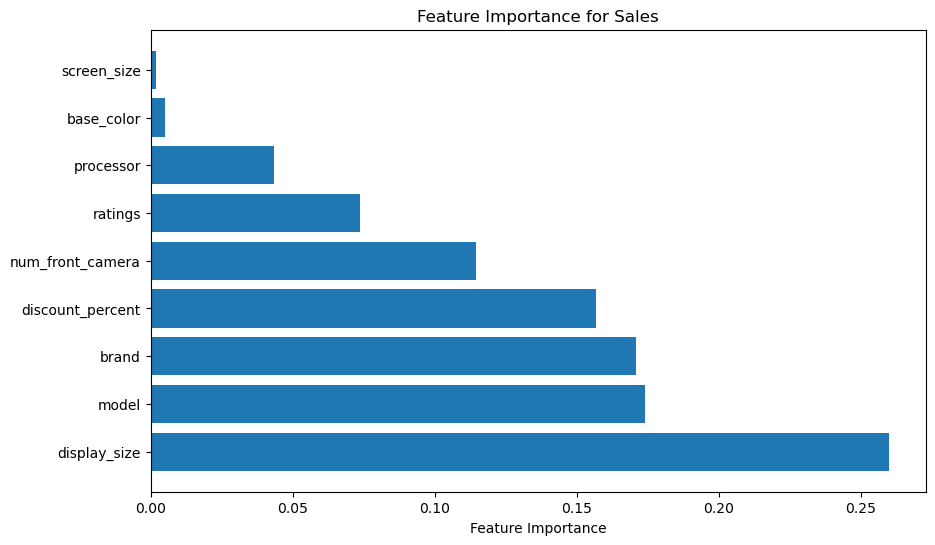

In [28]:
# Extract feature importances
feature_importance = dt.feature_importances_

# Get the feature names
feature_names = x_train.columns

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Sales')
plt.show()

Feature importance in regressionn is used to determine the significance of different input features or variables in predicting the target variable. It's relevant in understanding which features have a stronger influence on the model's predictions.

Here for the decision tree model for sales, we can say that display size has the most influence followed by model and brand so the product designers and business owners need to focus on these features to increase their sales. Base color and screen size ha least amount of influence on model prediction.

#### Pruning to prevent complexity and overfitting

Determining the best parameters for pruning

In [29]:
# Defining the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': np.linspace(0, 0.05, 100)
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train,y_train)  

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'ccp_alpha': 0.03282828282828283, 'max_depth': 10, 'min_samples_split': 2}


Pruning helps in generalization and predictive performance of the model. It involves limiting the growth of the tree by either removing some branches post-pruning (max_depth,min_samples_split) and by avoiding growing certain branches pre-pruning (ccp_alpha).

Pruning the decision tree with obtained best parameters

In [30]:
#fit the decision tree dt
dtp = DecisionTreeRegressor(random_state=42,max_depth=10, min_samples_split=2,ccp_alpha=0.032)
dtp.fit(x_train,y_train)

#predicting target
prediction=dtp.predict(x_test)
dtp.score(x_test,y_test)

0.8708707503547961

#### Scatter plot for actual values vs predicted values

Text(0.5, 1.0, 'Actual values vs Predicted values')

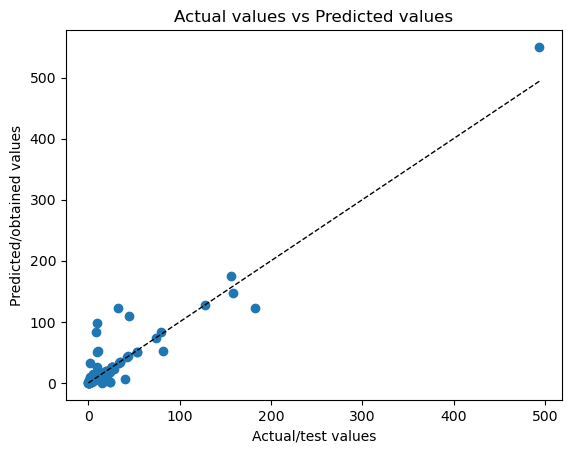

In [31]:
plt.scatter(y_test,prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=1, color='black')
plt.xlabel('Actual/test values')
plt.ylabel('Predicted/obtained values')
plt.title('Actual values vs Predicted values')

Decision tree model is able to predict majority of values ranging from 0 to 200, for values higher the model is under predicting.

Model      &nbsp;    &nbsp;   &nbsp;      &nbsp;   &nbsp;  &nbsp;&nbsp;    &nbsp;   &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;   &nbsp;    &nbsp;    Scores

Linear regression &nbsp;    &nbsp;   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;   &nbsp;    &nbsp;      0.236944309

redge regression  &nbsp;    &nbsp;   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;   &nbsp;    &nbsp;          0.221417577

Lasso regression   &nbsp;    &nbsp;   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;   &nbsp;    &nbsp;         0.117362426

decision tree  &nbsp;    &nbsp;   &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;   &nbsp;    &nbsp;             0.8708707503547961

Linear, Lasso, and Ridge regression are linear models that assume a linear relationship between features and the target variable therefore we see low model scores. As the actual relationship is more complex, these models were not able to capture it effectively.
Decision trees are capable of capturing non-linear relationships and interactions between variables, providing more flexibility to fit complex patterns in the data hence higher model score.

#### Predicting sales with desired features

In [32]:
# initialize list with requried feature data
data = [[6.7,1,4.3,20,0,4,2,1,2]] 
  
# Create the pandas DataFrame with features 
df = pd.DataFrame(data, columns=['display_size','num_front_camera','ratings','discount_percent','screen_size','processor','brand','base_color','model']) 
  
# print dataframe. 
df 

,display_size,num_front_camera,ratings,discount_percent,screen_size,processor,brand,base_color,model
0,6.7,1,4.3,20,0,4,2,1,2


In [33]:
#predicting the sales with input data.
pred = dtp.predict(df)
print(pred)

[43.57]
